In [1]:
from rainbowList import *   # rainbowList_noY
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# some drawing helper functions
def arc(ax, a, b, color='b', hl=False):
    if not (a and b): return
    if hl:
        ax.add_artist(plt.Circle(((a+b)/2, 0), (a-b)/2, color='k', fill=False, linewidth=3))
        ax.add_artist(plt.Circle(((a+b)/2, 0), (a-b)/2, color=color, fill=False, linewidth=1.5))
    else:
        ax.add_artist(plt.Circle(((a+b)/2, 0), (a-b)/2, color=color, fill=False))
def line(ax, a, b, color='b', hl=False):
    if not (a and b): return
    def y(x): return 4*(np.log2(x&-x)+1)
    if hl:
        ax.add_artist(plt.Line2D((a, b), (y(a), y(b) if b else y(a)+1), color='k', linewidth=3))
        ax.add_artist(plt.Line2D((a, b), (y(a), y(b) if b else y(a)+1), color=color, linewidth=1.5))
    else: 
        ax.add_artist(plt.Line2D((a, b), (y(a), y(b) if b else y(a)+1), color=color))

N(n63	i=63	r=_	g=62	b=32	n=62)
N(n62	i=62	r=61	g=60	b=32	n=61)
N(n60	i=60	r=58	g=56	b=32	n=59)
N(n56	i=56	r=52	g=48	b=32	n=55)
N(n48	i=48	r=40	g=32	b=32	n=47)
N(n40	i=40	r=36	g=32	b=24	n=39)
N(n24	i=24	r=20	g=16	b=16	n=23)
N(n20	i=20	r=18	g=16	b=12	n=19)
N(n12	i=12	r=10	g=8	b=8	n=11)
N(n10	i=10	r=9	g=8	b=6	n=9)
N(n6	i=6	r=5	g=4	b=4	n=5)
N(n5	i=5	r=_	g=4	b=3	n=4)
N(n3	i=3	r=_	g=2	b=2	n=2)
None


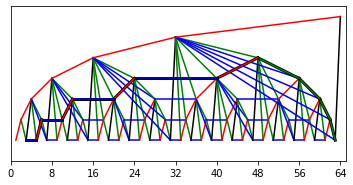

In [4]:
p = 6
N, x, y, draw = 2**p, 2**p-1, 3, line
# N, x, y, draw = 2**p, np.random.randint(0, 2**p), np.random.randint(0, 2**p), line
x, y = max(x, y), min(x, y)
# print(x, y)

# build some nodes with values "n1", "n2", ...
nodes = [None]*(N+1)
for i in range(1,len(nodes)): nodes[i] = cons(f"n{i}", nodes[i-1])

# prepare the plot
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.set_aspect(1)
ax.set_xlim((0, N+1))
ax.set_ylim((0, (N+1)/3.5 if draw == arc else 4*np.log2(N)+6))
ax.axes.xaxis.set_ticks(range(0, 2**p+1, 8))
ax.axes.yaxis.set_ticks([])

# inject a step function into Node for tracing
def step(self, i):
    if i == self.i: return (None, None)
    if G(self.i) >= i and G(G(self.i)) >= G(i): return ('g', self.g)
    if B(self.i) >= i and G(B(self.i)) >= G(i): return ('b', self.b)
    if R(self.i) >= i and G(R(self.i)) >= G(i): return ('r', self.r) if self.r else ('k', self.n)
    return ('k', self.n)
setattr(Node, 'step', step)

# draw the structure
def I(m): return m.i if m else None
for n in nodes[1:]:
    D = {I(n.n):'k', I(n.r):'r', I(n.b):'b', I(n.y):'y', I(n.g):'g'}
    for i, color in D.items(): draw(ax, n.i, i, color)

# draw an indexing path
n = nodes[x]
print(debug(n))
color, m = n.step(y)
print(debug(m))
while m:
    draw(ax, n.i, m.i, color, hl=True)
    n = m
    color, m = n.step(y)    # n.step_1G(y) # run the cell below to use step_1G
    print(debug(m))


In [4]:
def step_1G(self, i):
    if i == self.i: return (None, None)
    if G(self.i) >= i: return ('g', self.g)
    return ('k', self.n)
setattr(Node, 'step_1G', step_1G)